# Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,activation
from keras.models import Sequential

In [2]:
#Import data
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Features Engineering-->
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Observation-- This dataset is so much clean dont ahve any missing value or catagorical features
#let's check correlation between all features again outcome
corr_metrics=df.corr()
correlation=corr_metrics["Outcome"].sort_values(ascending=False)
correlation

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<AxesSubplot:>

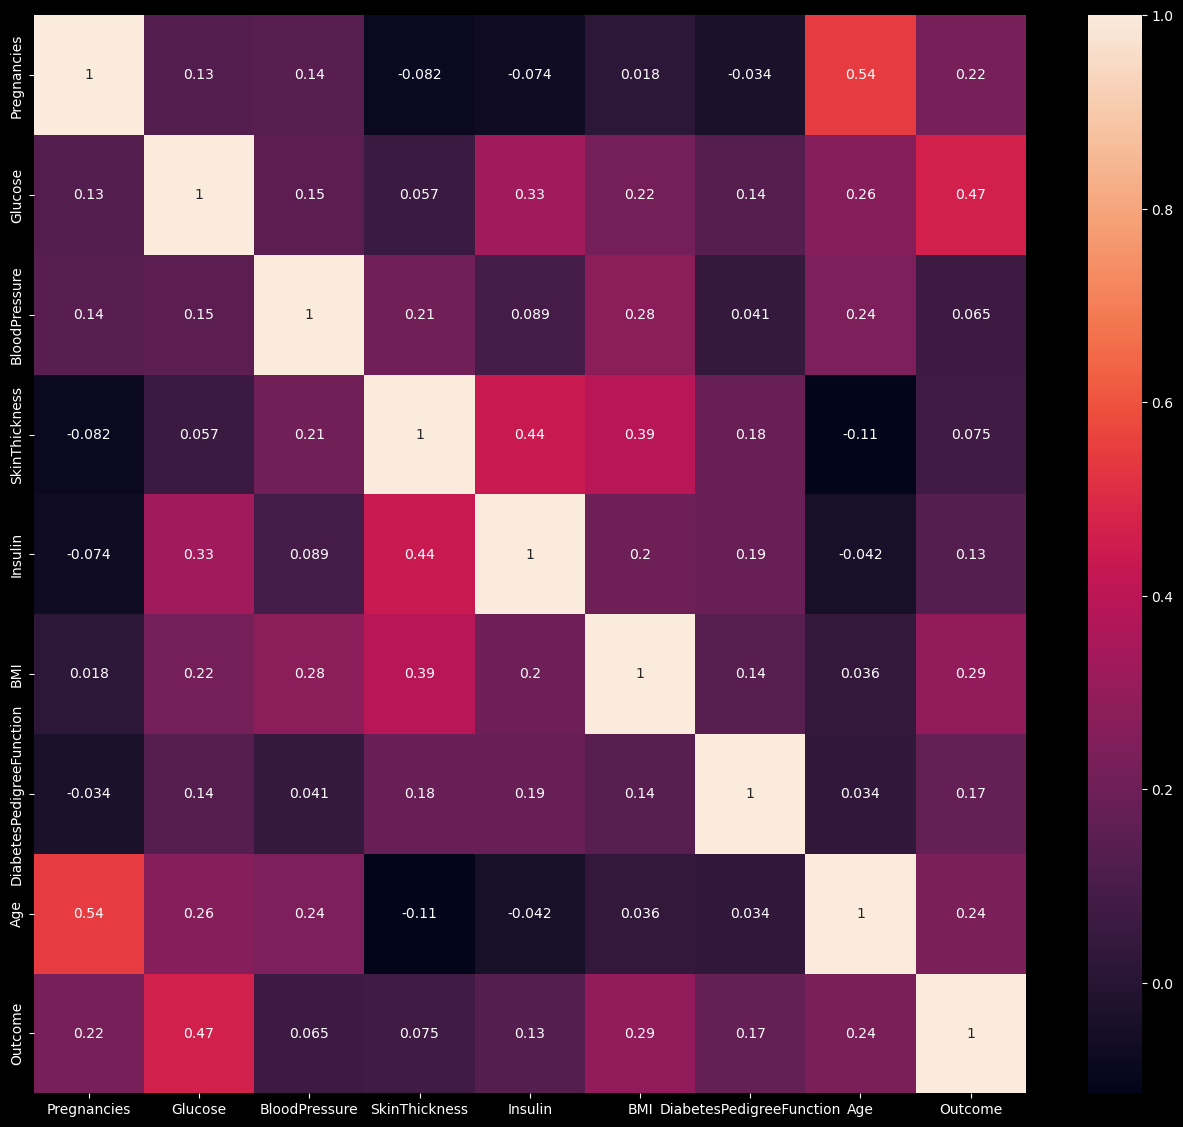

In [7]:
#Observation-- Outcom have strong correlation with Glucose level and BMI
plt.figure(figsize=(16,14))
sns.heatmap(corr_metrics,annot=True,fmt='.2g')

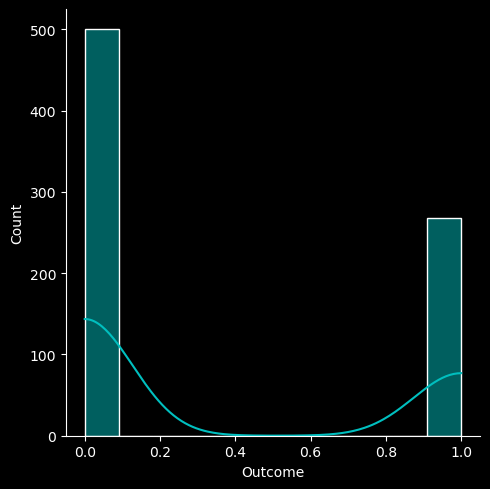

In [8]:
sns.displot(df["Outcome"],kde=True,color="c")

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

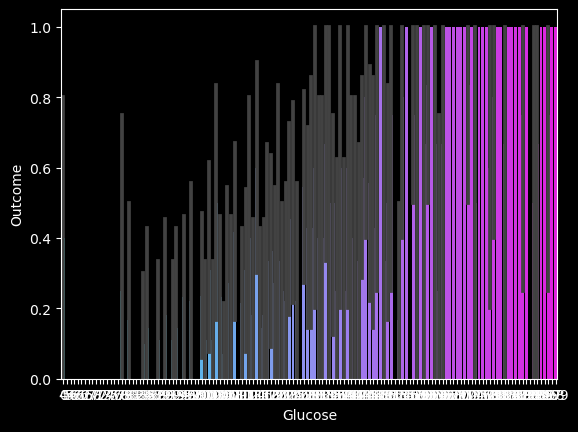

In [9]:
sns.barplot(x="Glucose",y="Outcome",data=df,palette="cool")

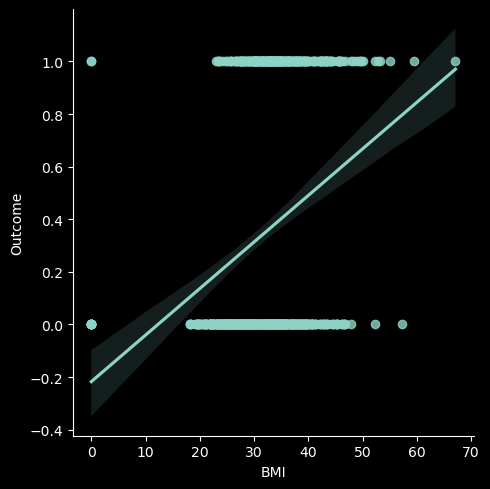

In [10]:
sns.lmplot(x="BMI",y="Outcome",data=df,palette="set1")

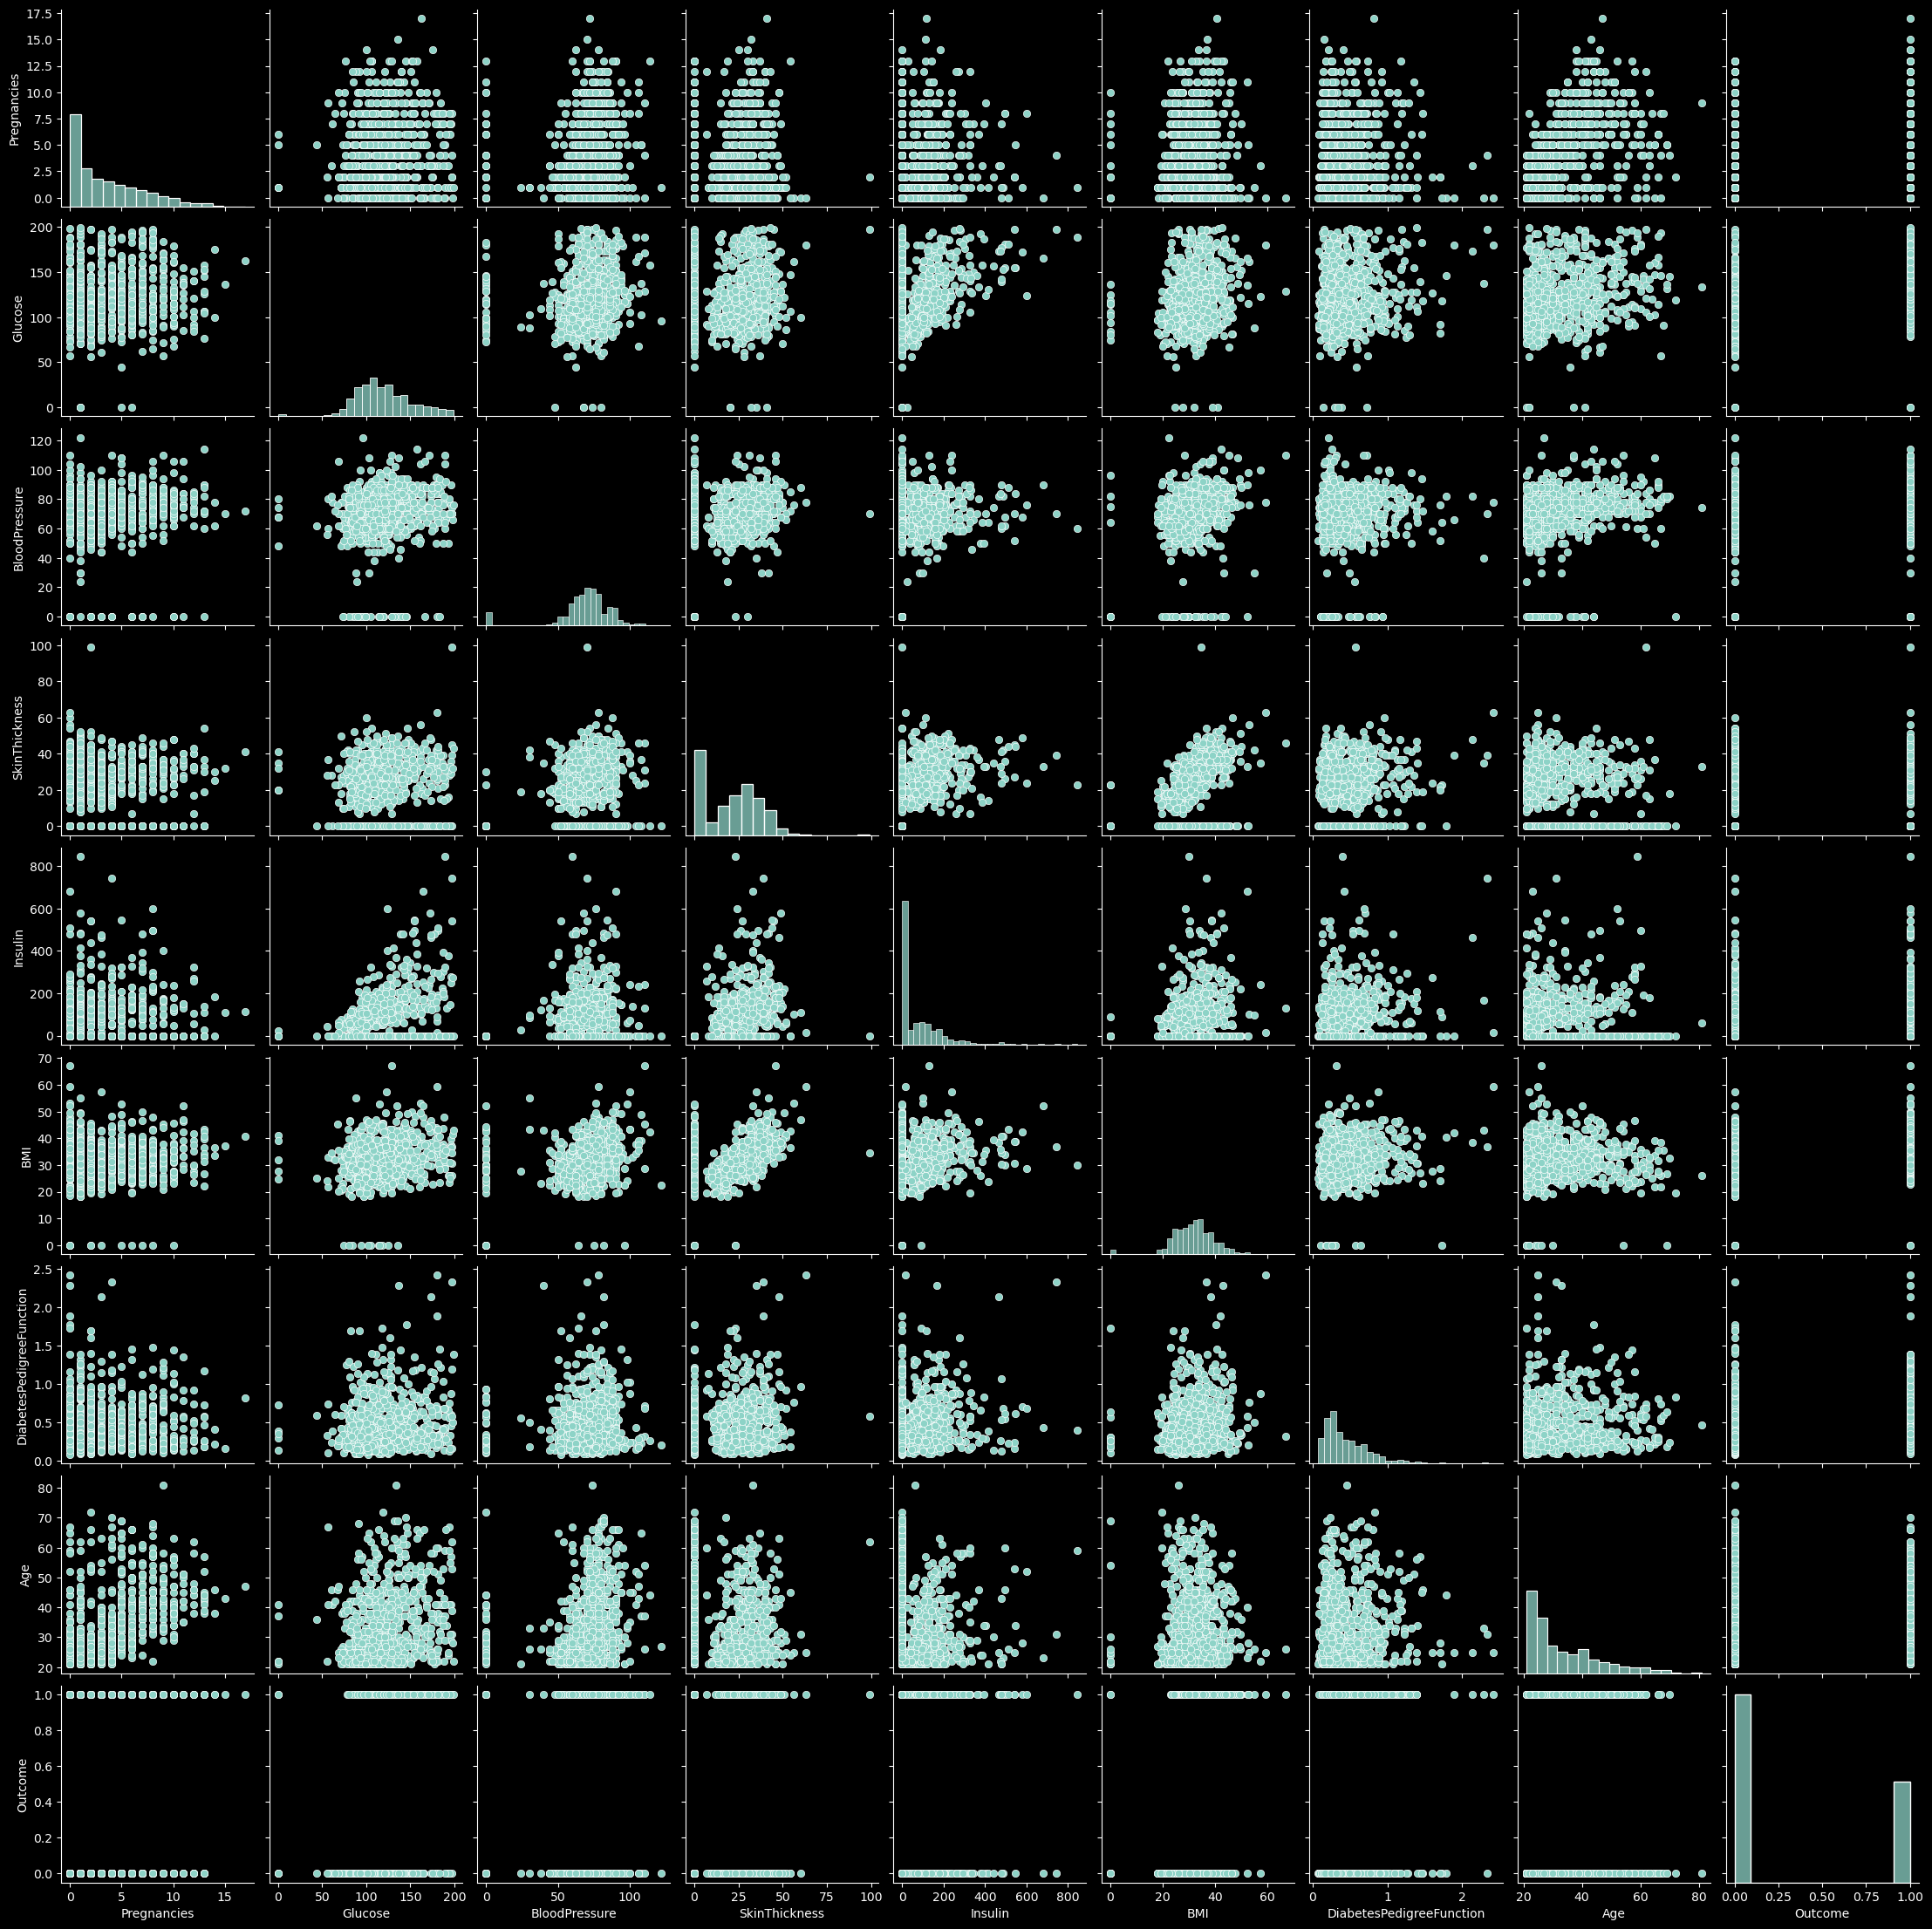

In [11]:
sns.pairplot(df)

In [12]:
#Observation--> For this dataset i think logicticregression algorithm will be work better
#Split the data into features and labels

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [15]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape

(614, 8)

In [17]:
x_test.shape

(154, 8)

In [18]:
y_train.shape

(614,)

In [19]:
y_test.shape

(154,)

In [20]:
#Features scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
#Model Build
from sklearn.linear_model import LogisticRegression #Accuracy: 75.32%
model=LogisticRegression()
#from sklearn.linear_model import LinearRegression
#model=LinearRegression()
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()

In [23]:
logmodel=model.fit(x_train,y_train)

In [24]:
#Model prediction with test data
prediction=model.predict(x_test)

In [25]:
#Error calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [26]:
#print("Accuracy of the model is: ",accuracy_score(y_test,prediction)*100)
print("Mean absolute error of the model is: ",mean_absolute_error(y_test,prediction))
print("Mean squared erro of the model is: ",mean_squared_error(y_test,prediction))
print("Mean root squared error of the model is: ",np.sqrt(mean_squared_error(y_test,prediction)))

Mean absolute error of the model is:  0.24675324675324675
Mean squared erro of the model is:  0.24675324675324675
Mean root squared error of the model is:  0.496742636335202


In [27]:
final = pd.DataFrame({"Actual":y_test,"Prediction":prediction})

In [28]:
final

,Actual,Prediction
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [29]:
#Creating a interactive function to check the model.
def predict(a,b,c,d,e,f,g,h):
    provide_data=[a,b,c,d,e,f,g,h]
    data_array=np.array(list(provide_data)).reshape(1,-1)
    new_data=scaler.transform(np.array(list(provide_data)).reshape(1,-1))
    output=logmodel.predict(new_data)
    output=(output[0])
    
    #output will be float value so converting this into a message.
    if output >=0.5:
        print("You have Diabetes! Concern with a Dr.")
    else:
        print("You don't have Diabetes!")
        
#Taking input from users    
a=float(input("Number of time pregnancies: "))
b=float(input("Plasma Glucose level: "))
c=float(input("Diastolic BloodPressure(mm Hg): "))
d=float(input("Triceps skin fold thickness (mm): "))
e=float(input("Serum insulin (mu U/ml): "))
f=float(input("Body mass index (weight in kg/(height in m)^2: "))
g=float(input("Diabetes pedigree (Diabetes history in relatives): "))
h=int(input("Enter your Age(Years): "))
predict(a,b,c,d,e,f,g,h)    

Number of time pregnancies: 1
Plasma Glucose level: 130
Diastolic BloodPressure(mm Hg): 70
Triceps skin fold thickness (mm): 33
Serum insulin (mu U/ml): 12
Body mass index (weight in kg/(height in m)^2: 60
Diabetes pedigree (Diabetes history in relatives): .3
Enter your Age(Years): 22
You have Diabetes! Concern with a Dr.


C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
#By running above funcion you can check the output 